# Quantum Random Number Generator (QRNG)

Random number generator in programming language is typically psuedo-random number generator, since it is actually deterministic. Let's try the code below:

In [19]:
import numpy as np

In [41]:
rng = np.random.default_rng(seed = 1)
for _ in range(10):
    print(rng.random())

0.5118216247002567
0.9504636963259353
0.14415961271963373
0.9486494471372439
0.31183145201048545
0.42332644897257565
0.8277025938204418
0.4091991363691613
0.5495936876730595
0.027559113243068367


I can tell your random number generator printed 0.511..., 0.950.., 0.144..., etc., which means you have the same result with mine, although `rng.random()` is supposed to give a <b>random</b> number. What's wrong? The key is that we fixed the seed, and with the same seed, the random number generator will look up the same table to generate random numbers. So our random number generator is <i>pseudo-</i>random, which means it imitates true one but it is not.

Quantum random number generator, on the other hand, relys on the fundamental principle of quantum mechanics, <b>the principle of quantum measurement.</b> If one perform quantum measurement with observable $\hat{O}$ on a quantum state $|\psi\rangle$, You expect three things:

1. the measurement result is one of the eigenvalues of $\hat{0}$, say, $\lambda_i$
2. the probability of getting the result of $\lambda_i$ is given by $|\langle i|\psi\rangle|^2$, where $|i\rangle$ is corresponding eigenstate of $\lambda_i$
3. once the measurement is done, the final state is collapsed into $|i\rangle$.

So if you prepare your quantum state as a superposition of more than one eigenstates, what state you will pick up after measurement is intrisically random, although you may know the probabilities!

In this notebook, we will run measurments on various quantum state, and run quantum random generator with real quantum machine.

In [23]:
# import qiskit
from qiskit import QuantumCircuit, execute, Aer, ClassicalRegister
from qiskit.visualization import plot_histogram

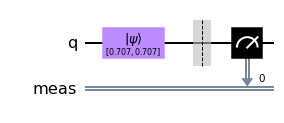

In [45]:
# create quantum circuit
p = 0.5 # probabilty of having |1> state
qc = QuantumCircuit(1)
qc.initialize([np.sqrt(1-p), np.sqrt(p)],0)
qc.measure_all()
qc.draw()

The circuit above initialize the qubit state to be [sqrt(1-p), sqrt(p)], so the probability of finding the state in 1 is p. Let's check this. 

In [43]:
# use simulator first
sim_backend = Aer.get_backend('qasm_simulator')

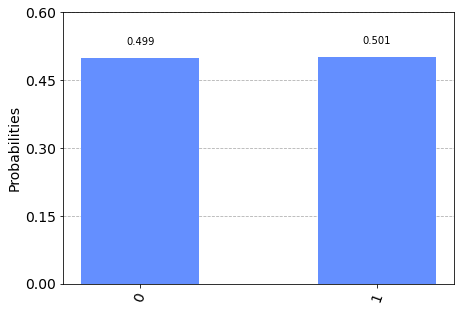

In [46]:
# run job and check the result
job = execute(qc, sim_backend, shots = 10000)
result = job.result()
plot_histogram(result.get_counts())

So it seems consistent, but it is still using pseudo-randomness of the simulator. Let's try the real quantum machine

In [3]:
# provider
from qiskit import IBMQ

In [4]:
# use your token here
my_token = ''

In [5]:
provider = IBMQ.enable_account(my_token)

In [6]:
IBMQ.get_provider(hub='ibm-q-skku', group='skku', project='saint') # SKKU is IBM quantum hub!

<AccountProvider for IBMQ(hub='ibm-q-skku', group='skku', project='saint')>

In [7]:
backend_single_qubit = provider.get_backend('ibmq_armonk') # just choose any machine not busy! we only need a single qubit.

In [47]:
# run job and check the result
job_single_qubit = execute(qc, backend_single_qubit, shots = 1000)

In [48]:
job_single_qubit.status()

<JobStatus.RUNNING: 'job is actively running'>

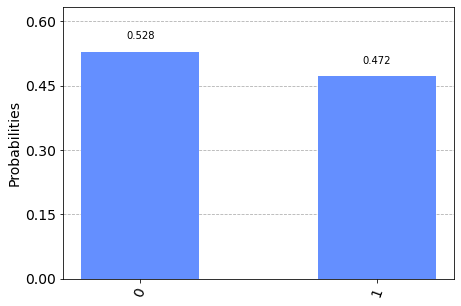

In [49]:
result = job_single_qubit.result()
plot_histogram(result.get_counts())

With a random number generator, we expect that every output has equal probability, i.e. $p=0.5$. Such a action can be replaced with <i>Hadamard gate</i>, which maps 0 and 1 states into + and - states. To generate N-bit binary random value with QRNG, We need more than single bit. 
Let's create QRNG circuit with given bit number. if you want to have $N$ different outputs, you will need $log_2 N$ qubits.

In [33]:
def qrng(bit_number:int):
    assert bit_number > 0 & isinstance(bit_number, int)
    qc = QuantumCircuit(bit_number)
    for i in range(bit_number):
        qc.h(i)
    qc.measure_all()
    return qc

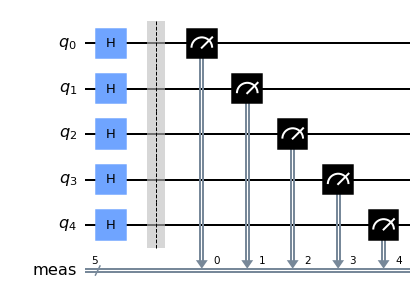

In [14]:
qc = qrng(5)
qc.draw()

In [12]:
backend = provider.get_backend('ibmq_16_melbourne') # choose a machine with sufficient qubit number

In [15]:
# run job and check the result
job_qrng = execute(qc, backend, shots = 8192)

In [35]:
job_qrng.status()

<JobStatus.DONE: 'job has successfully run'>

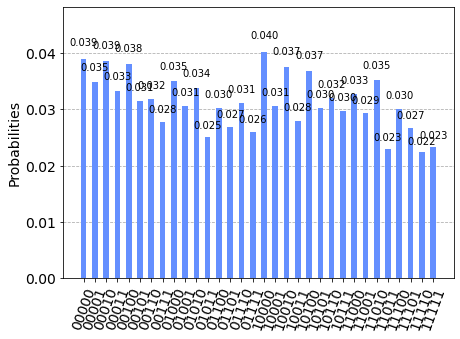

In [36]:
result = job_qrng.result()
plot_histogram(result.get_counts())

In [37]:
1/32

0.03125

## Draw!

In [50]:
qc = qrng(6)

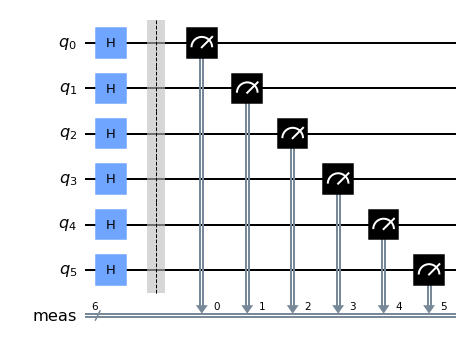

In [54]:
qc.draw()

In [52]:
job_hoodie = execute(qc, backend, shots = 1)
job_shirts = execute(qc, backend, shots = 2)
job_starbucks = execute(qc, backend, shots = 5)
jobs = [job_hoodie, job_shirts, job_starbucks]

스벅 아이스 아메리카노 5명

In [59]:
counts = job_starbucks.result().get_counts()
for key in counts.keys():
    print(int(key, 2)%45)

24
0
11
13
13


In [61]:
job_starbucks_re = execute(qc, backend, shots = 1)

In [65]:
job_starbucks_re.status()

<JobStatus.DONE: 'job has successfully run'>

In [66]:
counts = job_starbucks_re.result().get_counts()
for key in counts.keys():
    print(int(key, 2)%45)

27


In [63]:
job_starbucks_re2 = execute(qc, backend, shots = 1)

아이온큐 티셔츠 2명

In [60]:
counts = job_shirts.result().get_counts()
for key in counts.keys():
    print(int(key, 2)%45)

32
7


아이온큐 후드티 1명

In [57]:
counts = job_hoodie.result().get_counts()
for key in counts.keys():
    print(int(key, 2))

25
